# Homework 02. Regression

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wget

In [36]:
import wget

url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'
wget.download(url, 'dataset.csv')

100% [............................................................................] 298573 / 298573

'dataset (14).csv'

In [37]:
df = pd.read_csv('dataset.csv')

In [38]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


# Data Preparation

In [39]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [40]:
strings = list(df.dtypes[df.dtypes =='object'].index)

In [41]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [42]:
df = df[['ram','storage','screen','final_price']]

In [43]:
df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


# EDA

In [44]:
# Statistics about each column

In [45]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print(df[col].nunique())
    print()
    

ram
[  8  16  32  12   4  64 128   6  40]
9

storage
[ 512  256 1000   64  128   32    0 2000  500 4000 3000  240]
12

screen
[15.6  17.3  14.   16.1  13.3  16.   13.6  17.   15.3  14.5  13.4  14.2
 18.   14.1  12.4  13.5  16.2  15.   11.6  13.   10.5  14.4    nan 12.3
 15.4  12.5  10.1  10.95 12.   13.9 ]
29

final_price
[1009.    299.    789.   ... 2699.99 1899.99 1699.99]
1440



In [46]:
# Distribution of price

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='final_price', ylabel='Count'>

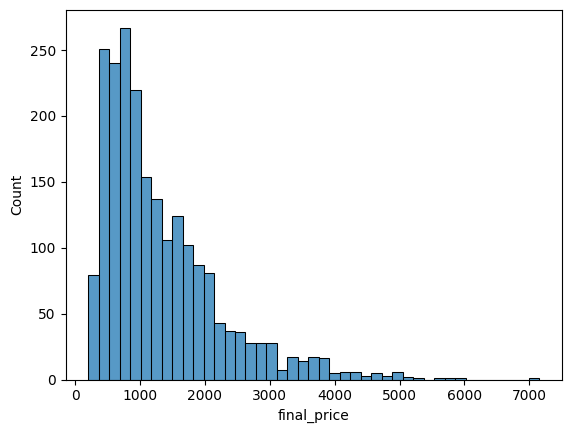

In [48]:
sns.histplot(df.final_price)

In [49]:
final_price_logs = np.log1p(df.final_price)

In [50]:
final_price_logs

0       6.917706
1       5.703782
2       6.672033
3       7.090077
4       6.507293
          ...   
2155    7.901374
2156    7.972807
2157    8.131822
2158    7.550130
2159    7.438966
Name: final_price, Length: 2160, dtype: float64

<Axes: xlabel='final_price', ylabel='Count'>

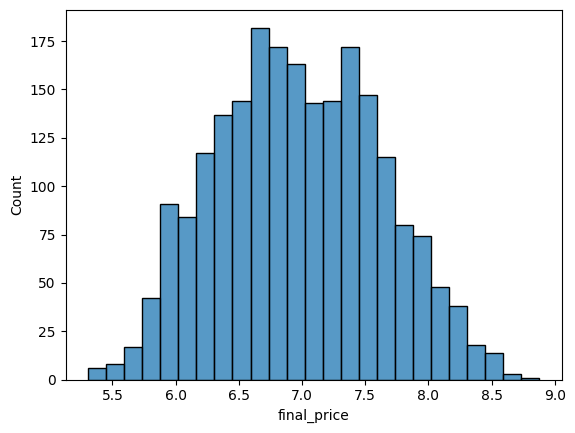

In [51]:
sns.histplot(final_price_logs)

In [52]:
# Missing Values

In [53]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

# Question 2

In [54]:
ram_median = df['ram'].median()

In [55]:
ram_median

np.float64(16.0)

In [56]:
# Shuffling and splitting

In [57]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [58]:
df_train

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00
...,...,...,...,...
1777,8,256,14.0,549.00
183,32,1000,16.0,1999.00
137,16,512,15.6,1059.00
899,16,512,14.0,1671.00


In [59]:
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

# Remove the 'final_price' column from the dataframes
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [60]:
df_train.iloc[10]

ram         16.0
storage    512.0
screen      15.6
Name: 674, dtype: float64

In [61]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

# Question 3

In [62]:
df_train.dtypes

ram          int64
storage      int64
screen     float64
dtype: object

In [63]:
X_train = df_train.values

In [64]:
df_train.isnull().sum()

ram        0
storage    0
screen     3
dtype: int64

In [65]:
# RMSE
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [66]:
base = ['ram', 'storage', 'screen']

In [67]:
def prepare_X_with_0(df, base):
    df_num_zero = df[base]
    df_num_zero = df_num_zero.fillna(0)
    X_zero = df_num_zero.values
    return X_zero

In [68]:
def prepare_X_with_mean(df, base, df_train):
    df_num_mean = df[base]
    mean_values = df_train[base].mean()
    df_num_mean = df_num_mean.fillna(mean_values)
    X_mean = df_num_mean.values
    return X_mean

In [69]:
X_train_zero = prepare_X_with_0(df_train, base)
w_0_zero, w_zero = train_linear_regression(X_train_zero, y_train)
X_val_zero = prepare_X_with_0(df_val, base)
y_pred_val_zero = w_0_zero + X_val_zero.dot(w_zero)

In [70]:
rmse_zero = rmse(y_val, y_pred_val_zero)

In [71]:
rmse_zero_final = round(rmse_zero, 2)

In [72]:
rmse_zero_final

np.float64(597.36)

In [73]:
X_train_mean = prepare_X_with_mean(df_train, base, df_train )
w_0_mean, w_mean = train_linear_regression(X_train_mean, y_train)
X_val_mean = prepare_X_with_mean(df_val, base, df_train)
y_pred_val_mean = w_0_mean+ X_val_mean.dot(w_mean)

In [74]:
rmse_mean = rmse(y_val, y_pred_val_mean)

In [75]:
rmse_mean_final = round(rmse_mean, 2)

In [76]:
rmse_mean_final

np.float64(600.27)

# Question 4

In [77]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [78]:
X_train = prepare_X_with_0(df_train, base)
X_val = prepare_X_with_0(df_val, base)

In [79]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    
    y_pred_val = w_0 + X_val.dot(w)
    
    rmse_val = rmse(y_val, y_pred_val)
    rmse_rounded = round(rmse_val, 2) 
    
    print(f"r = {r}: RMSE = {rmse_rounded}")

r = 0: RMSE = 597.36
r = 0.01: RMSE = 597.36
r = 0.1: RMSE = 597.35
r = 1: RMSE = 597.21
r = 5: RMSE = 597.01
r = 10: RMSE = 597.06
r = 100: RMSE = 597.9


# Question 5

In [97]:
rmse_scores = []
for seed in range(10):
    np.random.seed(seed)
    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
    df_test = df_shuffled.iloc[n_train + n_val:].copy()

    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values
    np.random.seed(seed)

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']

    X_train = prepare_X_with_0(df_train, base)
    X_val = prepare_X_with_0(df_val, base)

    w_0, w = train_linear_regression(X_train, y_train)

    y_pred_val = w_0 + X_val.dot(w)

    rmse_val = rmse(y_val, y_pred_val)
    rmse_scores.append(rmse_val)

std_rmse = np.std(rmse_scores)

In [106]:
print(f"Std of RMSE scores: {round(std_rmse, 3)}")

Std of RMSE scores: 29.176


# Question 6

In [104]:
seed = 9

n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

np.random.seed(seed)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

df_train_combined = pd.concat([df_train, df_val])

y_train_combined = df_train_combined.final_price.values
y_test = df_test.final_price.values

del df_train_combined['final_price']
del df_test['final_price']

X_train_combined = prepare_X_with_0(df_train_combined, base)
X_test = prepare_X_with_0(df_test, base)

w_0, w = train_linear_regression_reg(X_train_combined, y_train_combined, r=0.001)

y_pred_test = w_0 + X_test.dot(w)

rmse_test = rmse(y_test, y_pred_test)

In [105]:
print(f"RMSE on the test set: {round(rmse_test, 2)}")

RMSE on the test set: 608.61
